In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X

tensor([[0.1872, 0.1890, 0.1805,  ..., 0.1791, 0.1756, 0.1754],
        [0.1980, 0.1989, 0.1974,  ..., 0.1850, 0.1930, 0.1860],
        [0.2103, 0.2107, 0.2080,  ..., 0.1960, 0.2044, 0.2041],
        ...,
        [0.4694, 0.4644, 0.4707,  ..., 0.4877, 0.4774, 0.4771],
        [0.5260, 0.5163, 0.5141,  ..., 0.4935, 0.5005, 0.5110],
        [0.5704, 0.5643, 0.5629,  ..., 0.5024, 0.4991, 0.5269]],
       dtype=torch.float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [12]:
torch.cuda.is_available()

True

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
deepmodel = m.DeepDenseVAE_mark_V(original_dim=160, latent_dim=15, encoder_dims=[256, 128])
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-4),
        loss_function="GaussianNLL",
        verbose=True
        )

cuda:0


In [12]:
loss_hist = svi(epochs=150, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/150], average_loss:92.1627, validation_loss:28.1558
Epoch [2/150], average_loss:-10.1405, validation_loss:-35.9677
Epoch [3/150], average_loss:-51.3513, validation_loss:-63.9627
Epoch [4/150], average_loss:-72.7548, validation_loss:-79.3561
Epoch [5/150], average_loss:-86.1162, validation_loss:-90.6704
Epoch [6/150], average_loss:-94.8796, validation_loss:-97.2971
Epoch [7/150], average_loss:-101.8307, validation_loss:-100.6202
Epoch [8/150], average_loss:-106.3473, validation_loss:-108.1592
Epoch [9/150], average_loss:-111.0493, validation_loss:-111.2793
Epoch [10/150], average_loss:-115.2775, validation_loss:-115.7103
Epoch [11/150], average_loss:-118.5674, validation_loss:-117.6329
Epoch [12/150], average_loss:-121.4966, validation_loss:-122.0716
Epoch [13/150], average_loss:-124.6078, validation_loss:-122.1789
Epoch [14/150], average_loss:-127.5077, validation_loss:-125.1055
Epoch [15/150], average_loss:-130.6452, validation_loss:-130.3382
Epoch [16/150], average_loss:-134

Epoch [126/150], average_loss:-206.0519, validation_loss:-202.1204
Epoch [127/150], average_loss:-205.8336, validation_loss:-202.7246
Epoch [128/150], average_loss:-206.4440, validation_loss:-204.3957
Epoch [129/150], average_loss:-206.2550, validation_loss:-204.5613
Epoch [130/150], average_loss:-206.8032, validation_loss:-203.0634
Epoch [131/150], average_loss:-207.2040, validation_loss:-201.8134
Epoch [132/150], average_loss:-206.3050, validation_loss:-203.7200
Epoch [133/150], average_loss:-207.1414, validation_loss:-203.3957
Epoch [134/150], average_loss:-206.3704, validation_loss:-203.2962
Epoch [135/150], average_loss:-207.4720, validation_loss:-203.7582
Epoch [136/150], average_loss:-208.1274, validation_loss:-204.4583
Epoch [137/150], average_loss:-207.5280, validation_loss:-201.9614
Epoch [138/150], average_loss:-206.5981, validation_loss:-205.1660
Epoch [139/150], average_loss:-207.6434, validation_loss:-202.5810
Epoch [140/150], average_loss:-208.3587, validation_loss:-203.

In [28]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:-209.1508, validation_loss:-205.3303
Epoch [2/100], average_loss:-208.9183, validation_loss:-205.9239
Epoch [3/100], average_loss:-208.6777, validation_loss:-206.4630
Epoch [4/100], average_loss:-209.8219, validation_loss:-206.2072
Epoch [5/100], average_loss:-208.3200, validation_loss:-205.9306
Epoch [6/100], average_loss:-209.9529, validation_loss:-206.2758
Epoch [7/100], average_loss:-209.3042, validation_loss:-203.2905
Epoch [8/100], average_loss:-209.3421, validation_loss:-206.7032
Epoch [9/100], average_loss:-210.1077, validation_loss:-204.6540
Epoch [10/100], average_loss:-210.0220, validation_loss:-207.1750
Epoch [11/100], average_loss:-209.9945, validation_loss:-205.3588
Epoch [12/100], average_loss:-210.0083, validation_loss:-206.3960
Epoch [13/100], average_loss:-210.4842, validation_loss:-206.7021
Epoch [14/100], average_loss:-209.7547, validation_loss:-206.9628
Epoch [15/100], average_loss:-210.2855, validation_loss:-206.6508
Epoch [16/100], ave

In [39]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:-215.3423, validation_loss:-210.0121
Epoch [2/100], average_loss:-215.5973, validation_loss:-212.2372
Epoch [3/100], average_loss:-215.7669, validation_loss:-211.2066
Epoch [4/100], average_loss:-215.4702, validation_loss:-212.0779
Epoch [5/100], average_loss:-215.3915, validation_loss:-212.2643
Epoch [6/100], average_loss:-215.6705, validation_loss:-212.4236
Epoch [7/100], average_loss:-216.1741, validation_loss:-211.0283
Epoch [8/100], average_loss:-215.9943, validation_loss:-211.8806
Epoch [9/100], average_loss:-215.4485, validation_loss:-212.4177
Epoch [10/100], average_loss:-216.3761, validation_loss:-211.3923
Epoch [11/100], average_loss:-215.9435, validation_loss:-212.0235
Epoch [12/100], average_loss:-215.3381, validation_loss:-211.0961
Epoch [13/100], average_loss:-216.1139, validation_loss:-212.0557
Epoch [14/100], average_loss:-216.2666, validation_loss:-211.5776
Epoch [15/100], average_loss:-216.2304, validation_loss:-213.0531
Epoch [16/100], ave

In [47]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-219.2389, validation_loss:-215.0258
Epoch [2/50], average_loss:-218.7974, validation_loss:-215.1562
Epoch [3/50], average_loss:-219.3941, validation_loss:-215.6067
Epoch [4/50], average_loss:-219.2627, validation_loss:-215.5489
Epoch [5/50], average_loss:-219.2429, validation_loss:-213.8492
Epoch [6/50], average_loss:-219.2699, validation_loss:-215.5185
Epoch [7/50], average_loss:-219.1207, validation_loss:-213.2612
Epoch [8/50], average_loss:-219.7169, validation_loss:-214.8666
Epoch [9/50], average_loss:-219.5520, validation_loss:-214.1503
Epoch [10/50], average_loss:-219.3172, validation_loss:-215.4133
Epoch [11/50], average_loss:-219.3651, validation_loss:-213.8373
Epoch [12/50], average_loss:-219.3196, validation_loss:-216.2839
Epoch [13/50], average_loss:-219.9552, validation_loss:-214.0330
Epoch [14/50], average_loss:-219.7806, validation_loss:-213.3190
Epoch [15/50], average_loss:-219.5355, validation_loss:-216.0049
Epoch [16/50], average_loss:-218.9

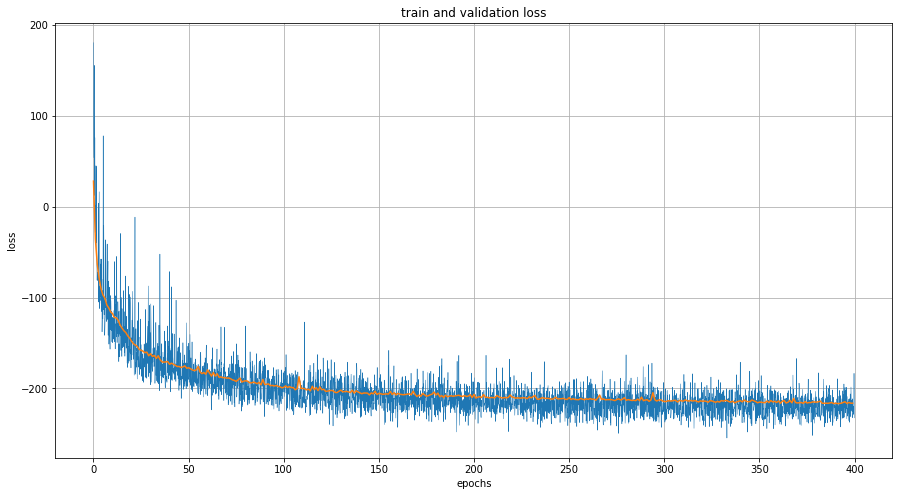

In [48]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis/10, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"])), svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs") # 1 epoch = 10 points on x axis
plt.ylabel("loss")
plt.show()

In [49]:
#torch.save(svi.model, "VAE_saves_and_logs/DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.pt")
#torch.save(svi.optimizer, "VAE_saves_and_logs/DeepDenseVAE_mark_V_[160-256-128-15]__VDO_GNLL_400ep_lr-1e-4_optimizer.pt")
#dd.save("VAE_saves_and_logs/DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


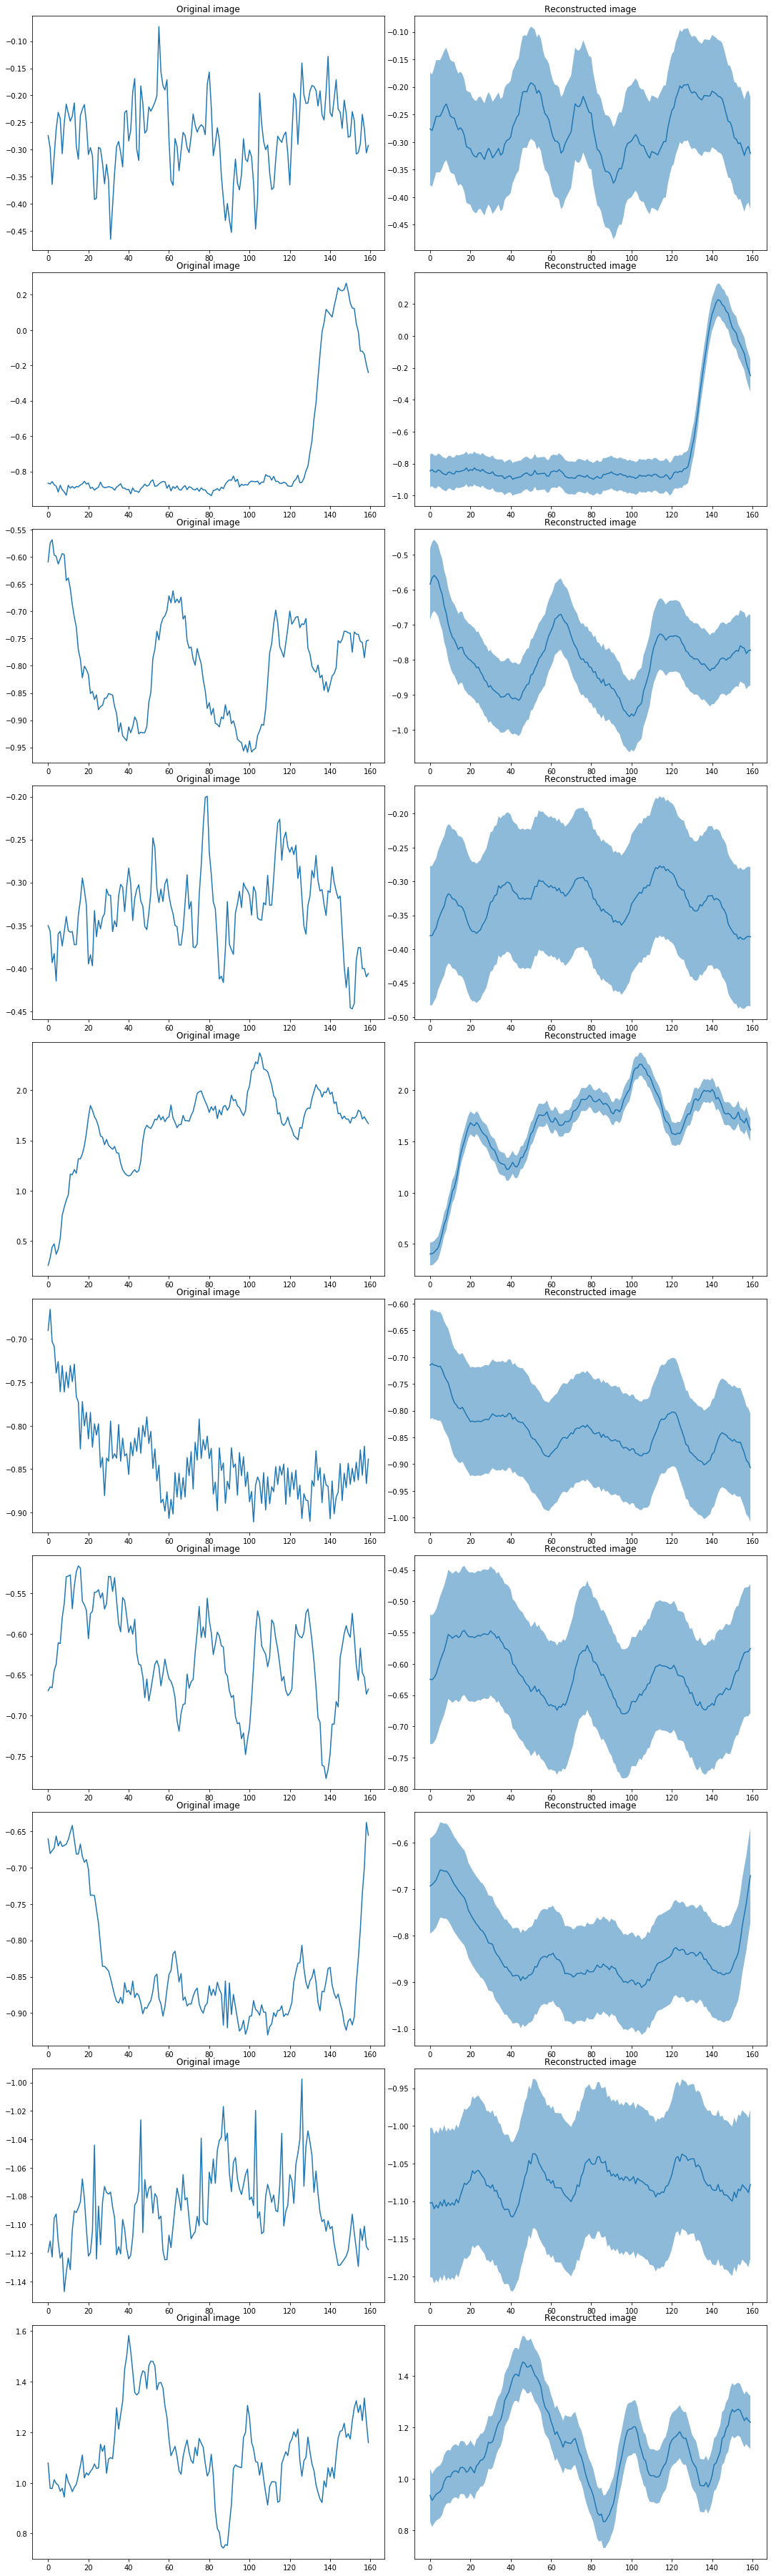

In [22]:
# epoch 150
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


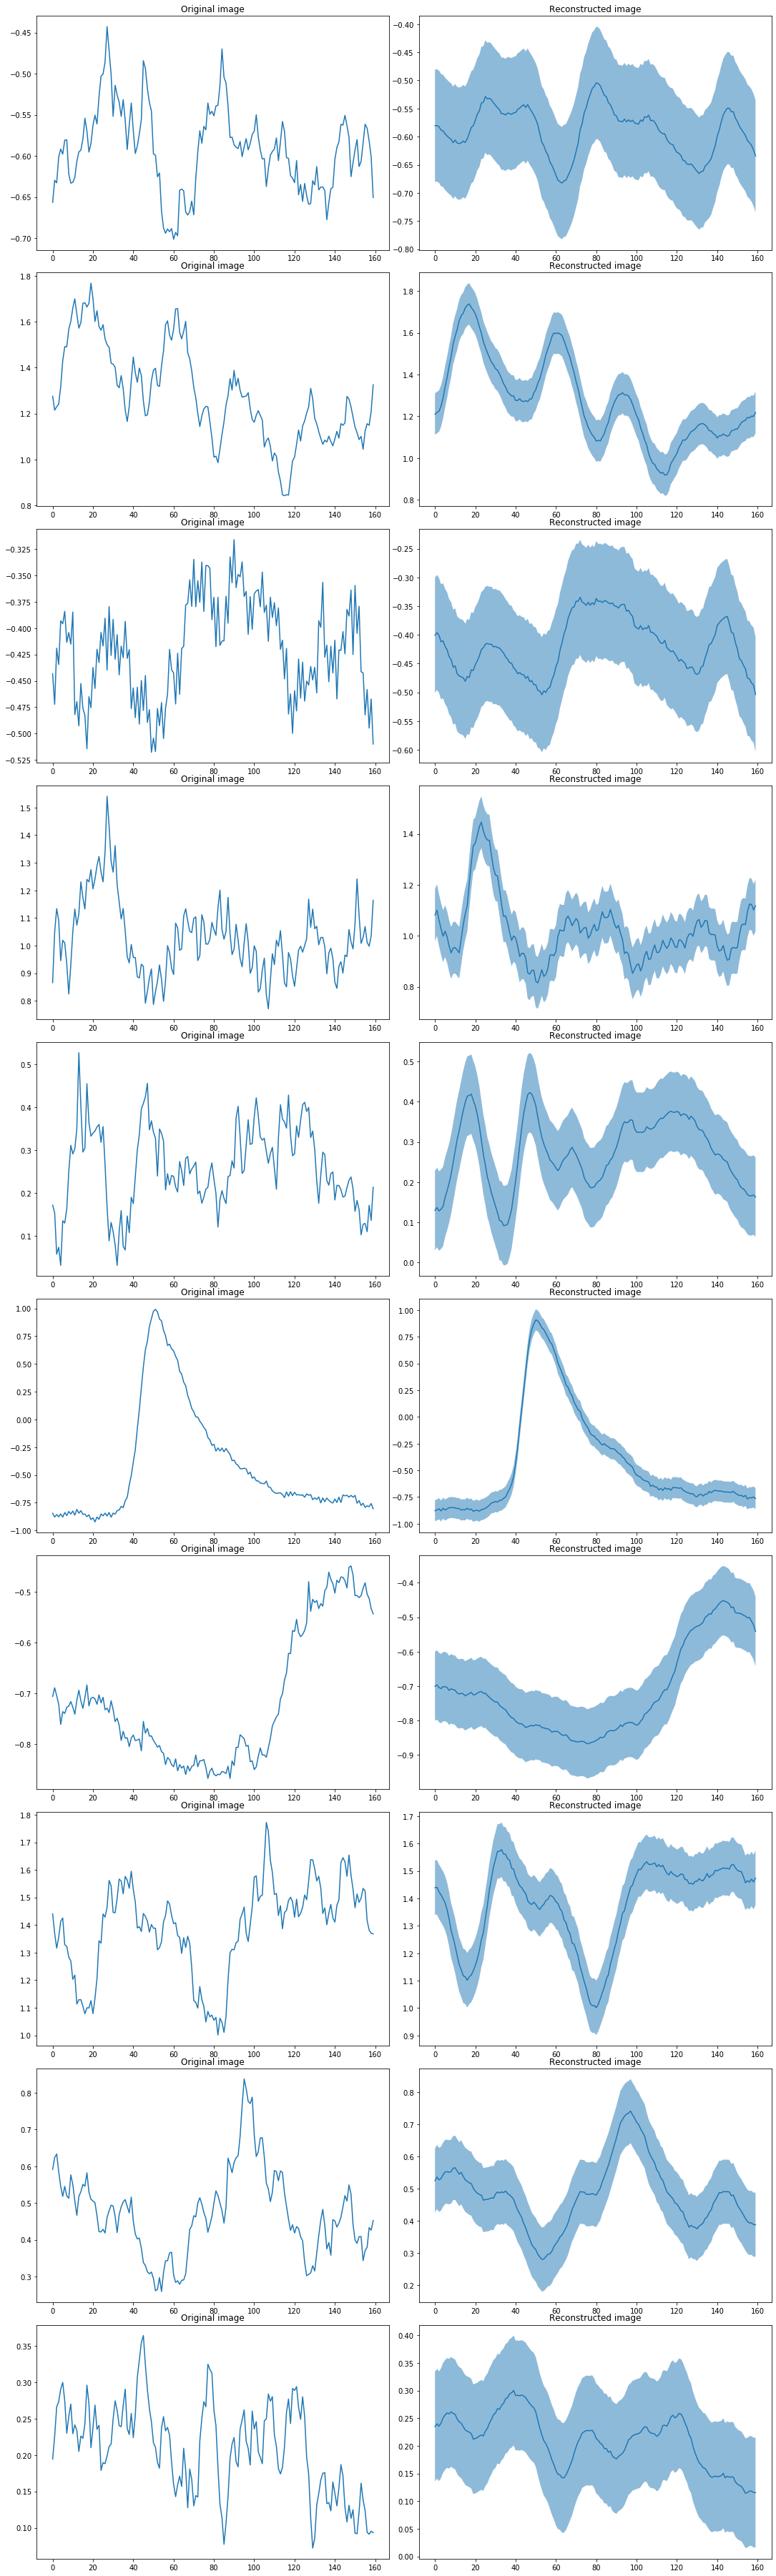

In [34]:
# epoch 250
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


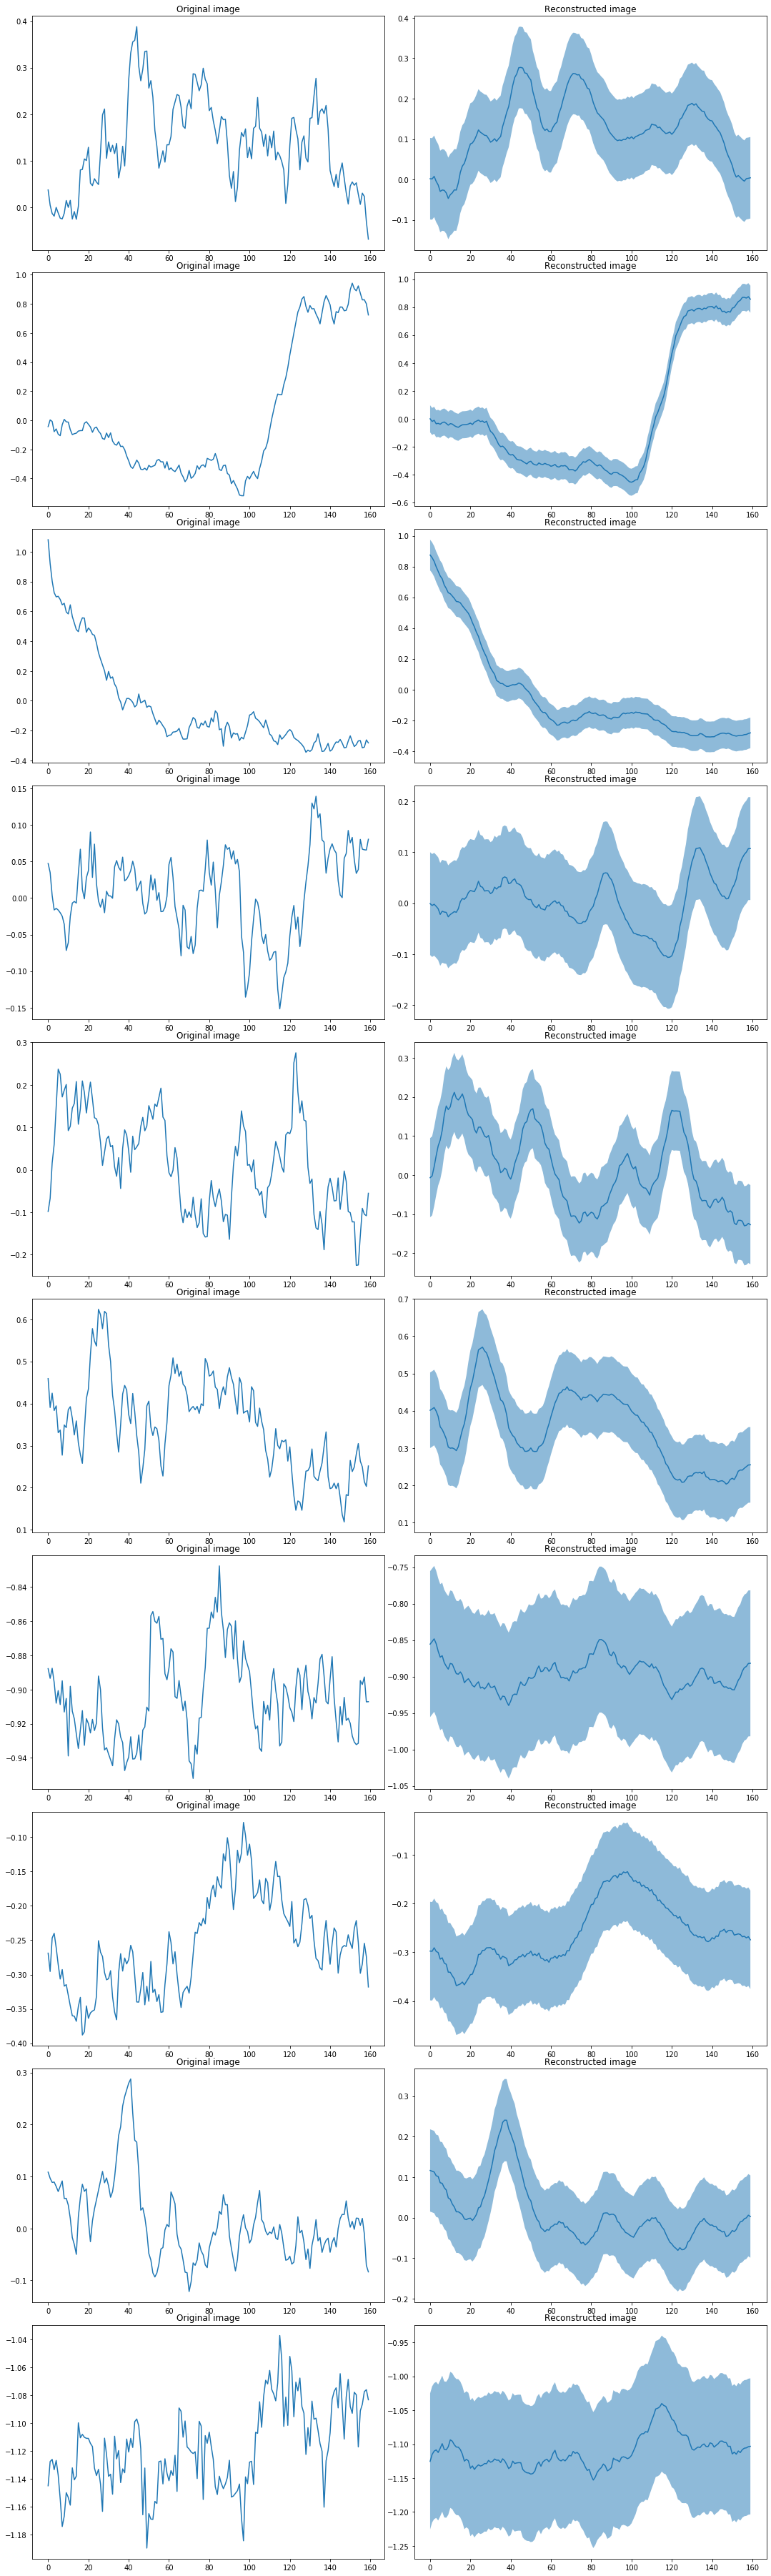

In [42]:
# epoch 350
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


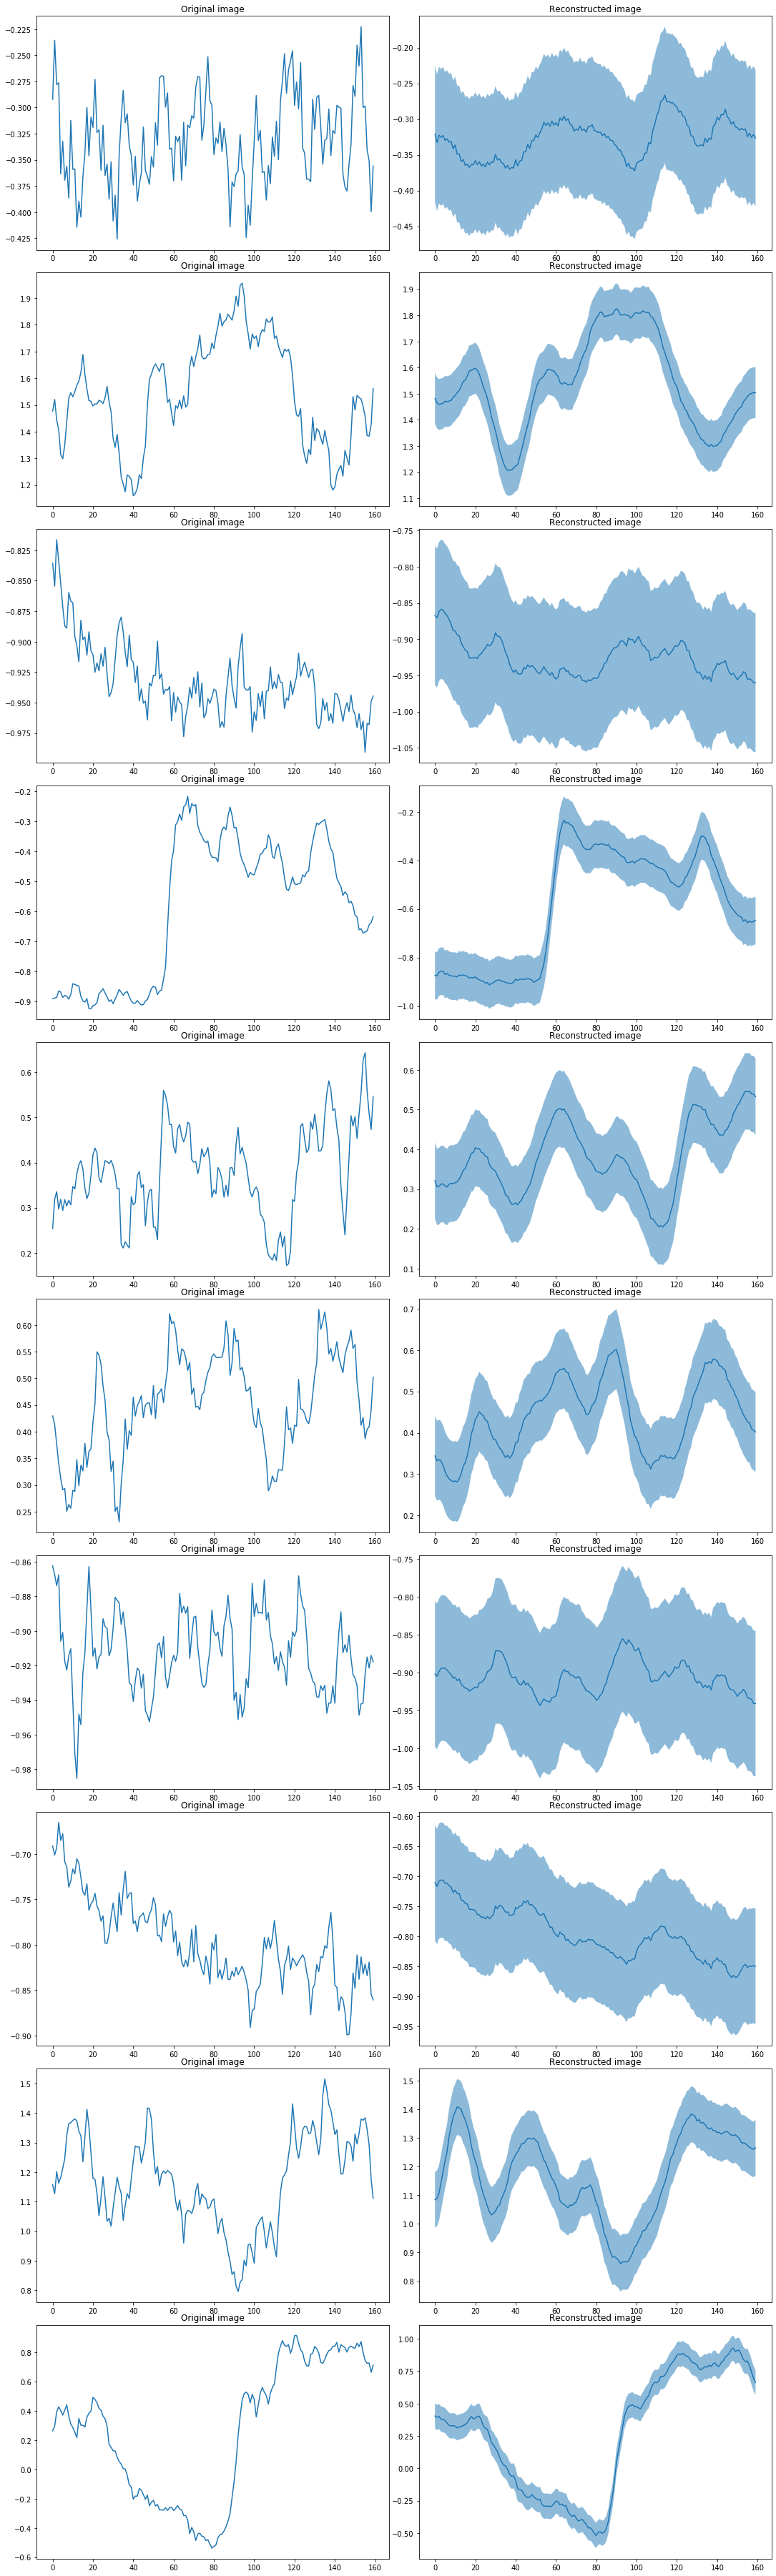

In [50]:
# epoch 400
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [51]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.pt")

In [52]:
mod.eval()

DeepDenseVAE_mark_V(
  (encoder): Sequential(
    (0): Linear(in_features=160, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): VariationalLayer(
      (mu): Linear(in_features=128, out_features=15, bias=True)
      (rho): Linear(in_features=128, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
    (4): VariationalDecoderOutput(
      (mu): Linear(in_features=256, out_features=160, bias=True)
      (rho): Linear(in_features=256, out_features=1, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
)

In [53]:
z, mu, sigma = mod.encoder(X.to(device))

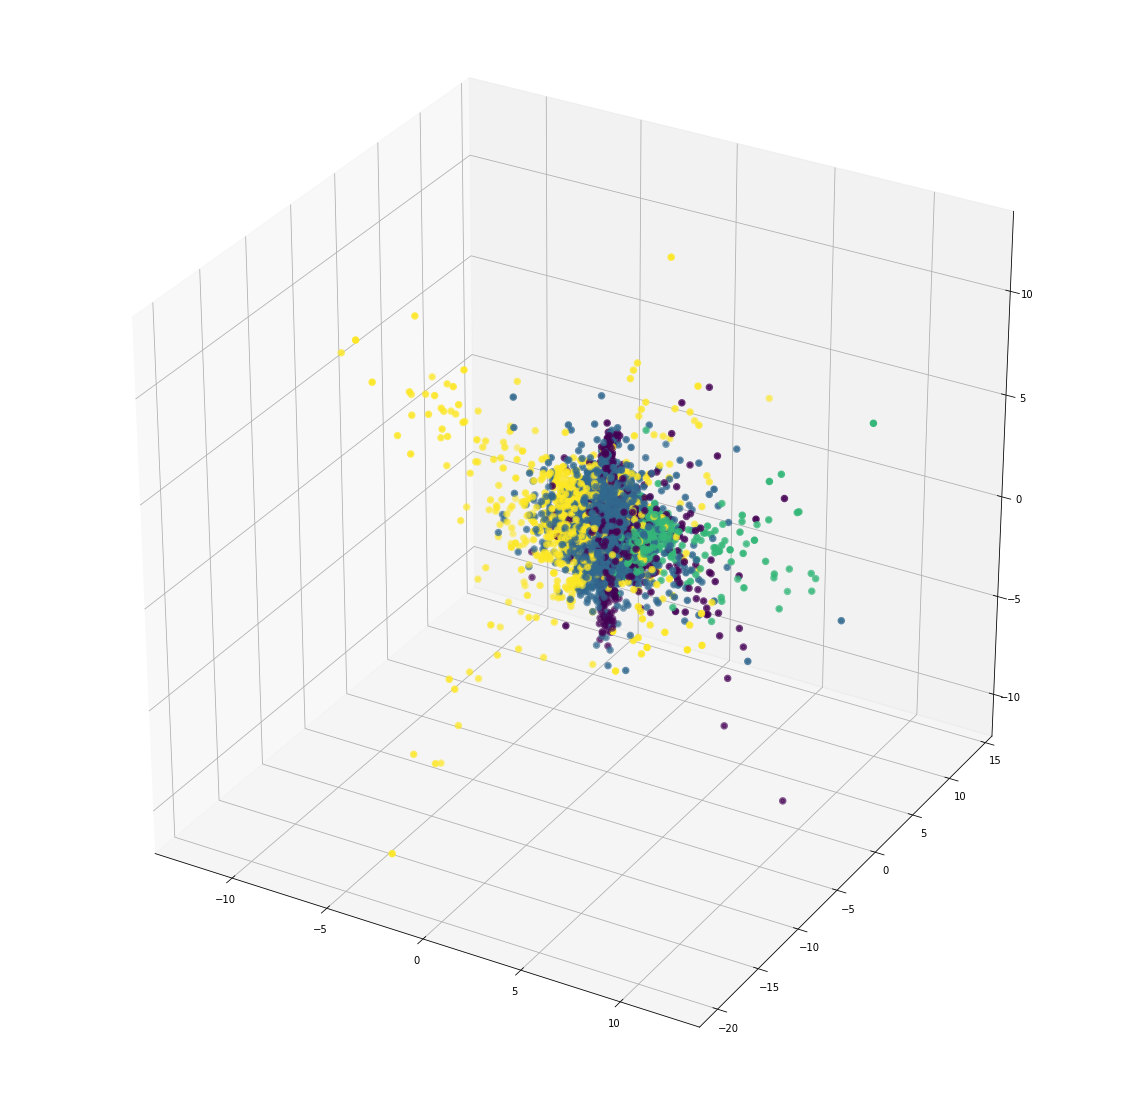

In [54]:
# epoch 400
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

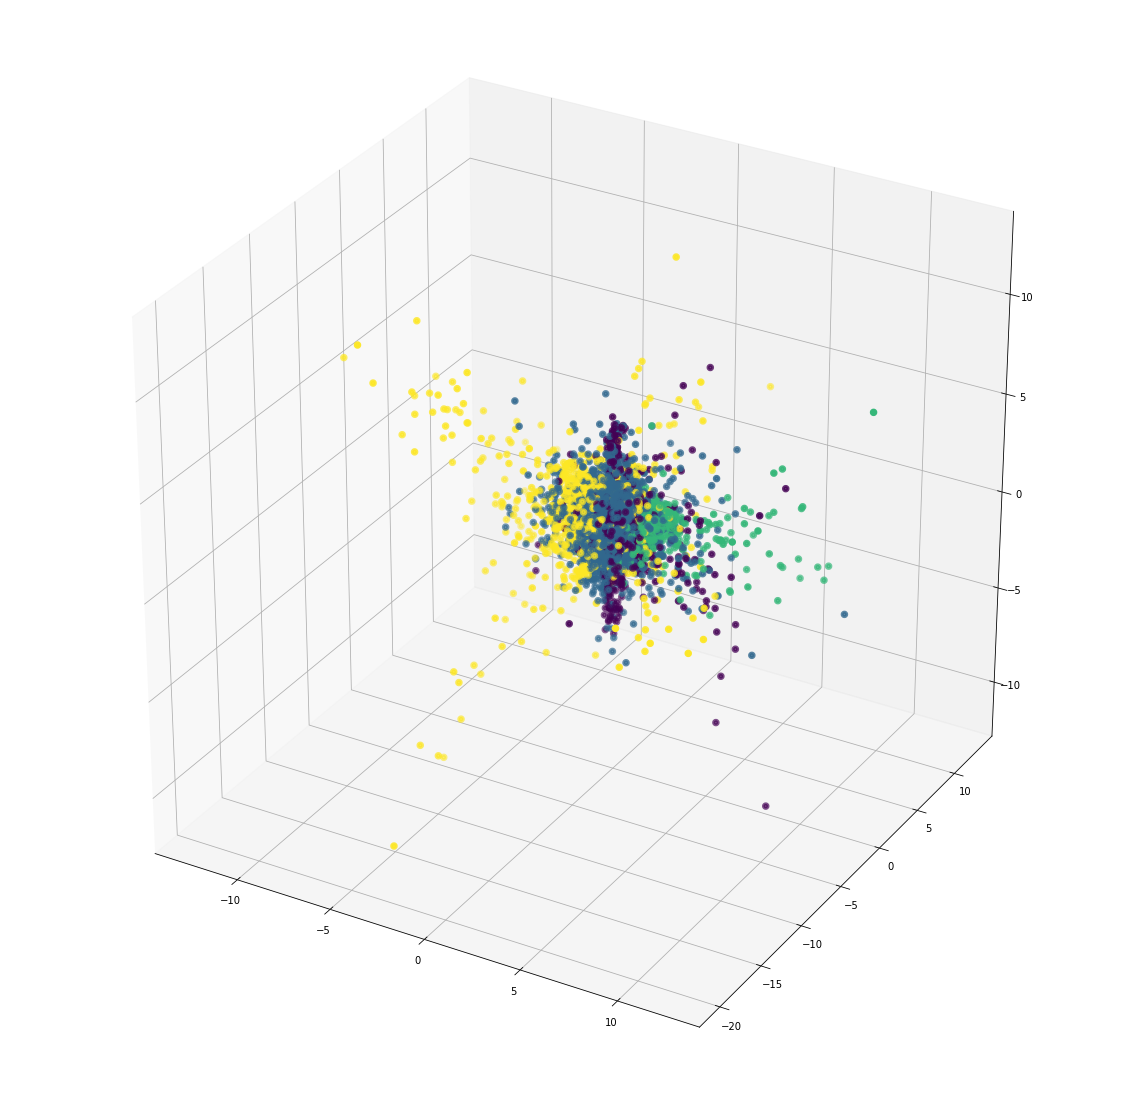

In [46]:
# epoch 350
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

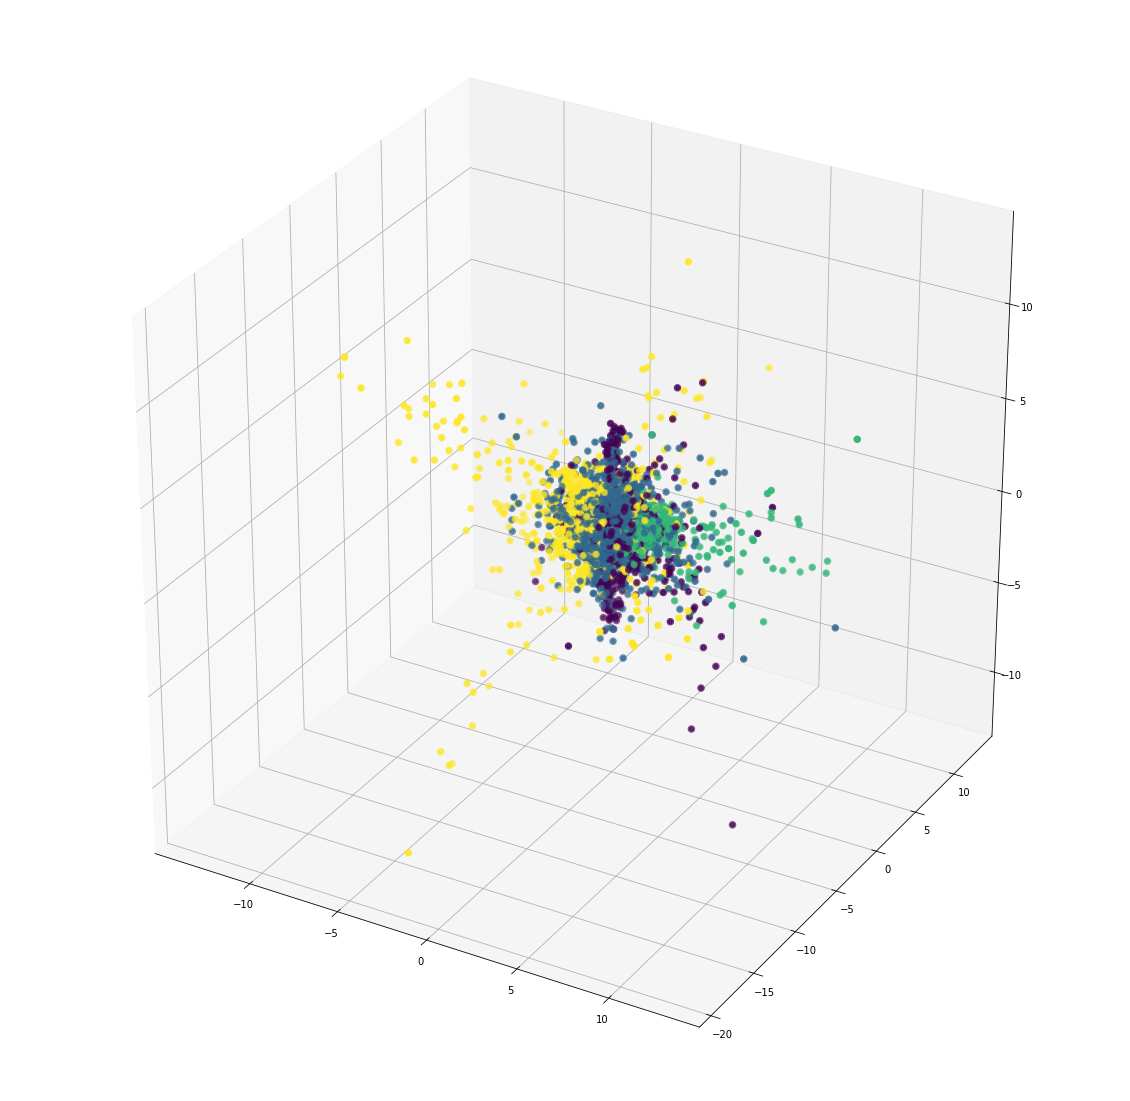

In [38]:
# epoch 250
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

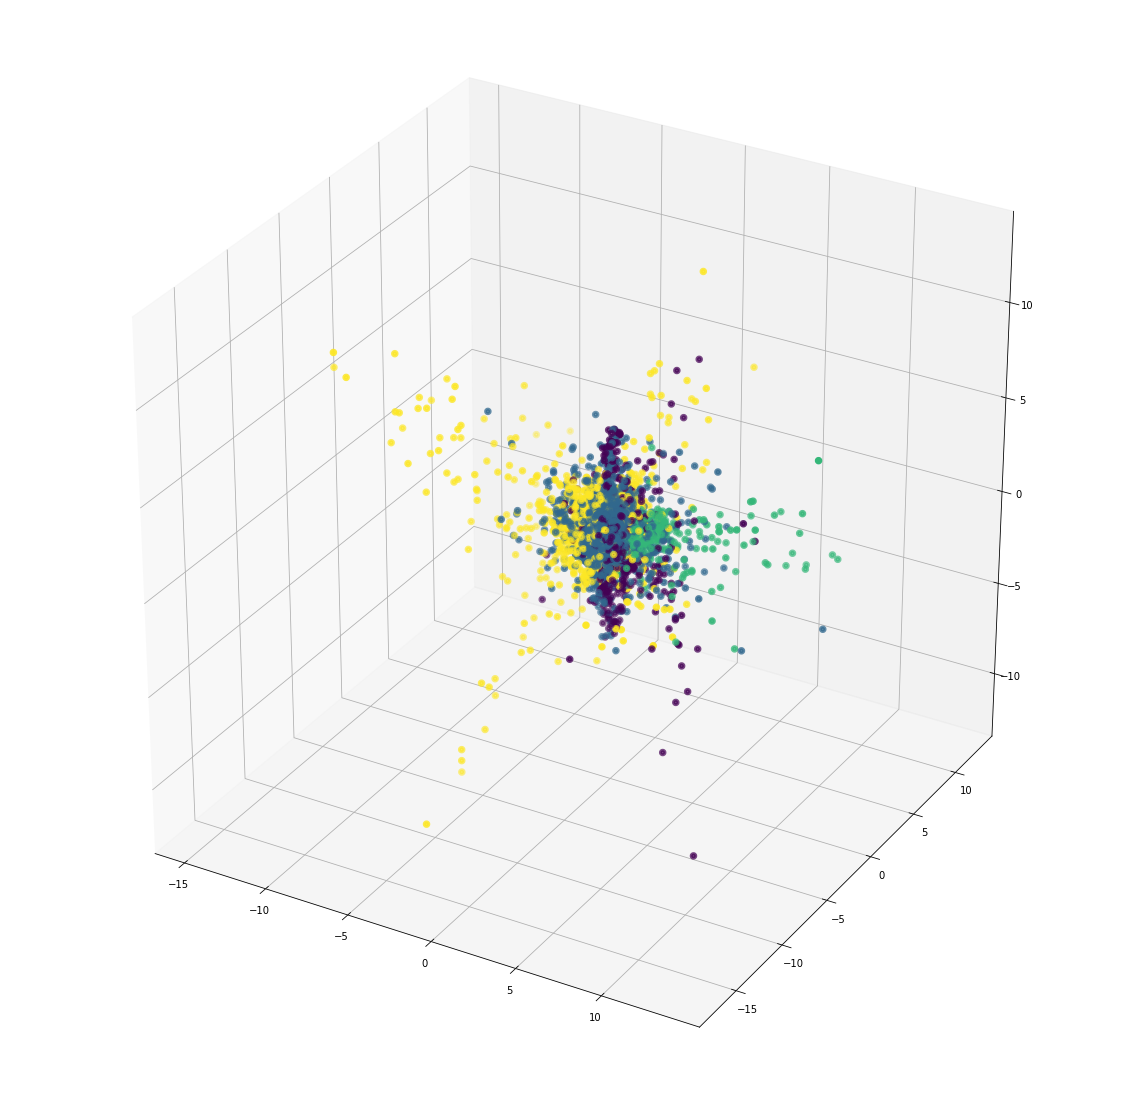

In [27]:
# epoch 150
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

In [ ]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

# t-SNE

In [14]:
mod = torch.load("VAE-saved_model_and_losses/DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.pt")

In [15]:
X = X.type(torch.float32)

In [16]:
z, mu, sigma = mod.encoder(X.to(device))

In [17]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device))
mu = mu.cpu().detach().numpy()

In [18]:
from sklearn.manifold import TSNE

In [19]:
X_embedded = TSNE(n_components=3, verbose=True).fit_transform(mu)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16736 samples in 0.028s...
[t-SNE] Computed neighbors for 16736 samples in 16.964s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16736
[t-SNE] Computed conditional probabilities for sample 2000 / 16736
[t-SNE] Computed conditional probabilities for sample 3000 / 16736
[t-SNE] Computed conditional probabilities for sample 4000 / 16736
[t-SNE] Computed conditional probabilities for sample 5000 / 16736
[t-SNE] Computed conditional probabilities for sample 6000 / 16736
[t-SNE] Computed conditional probabilities for sample 7000 / 16736
[t-SNE] Computed conditional probabilities for sample 8000 / 16736
[t-SNE] Computed conditional probabilities for sample 9000 / 16736
[t-SNE] Computed conditional probabilities for sample 10000 / 16736
[t-SNE] Computed conditional probabilities for sample 11000 / 16736
[t-SNE] Computed conditional probabilities for sample 12000 / 16736
[t-SNE] Computed conditional probabilities for sa

In [21]:
#np.save("VAE-saved_model_and_losses/t-SNE-emebeded_test_data-DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.npy", X_embedded)

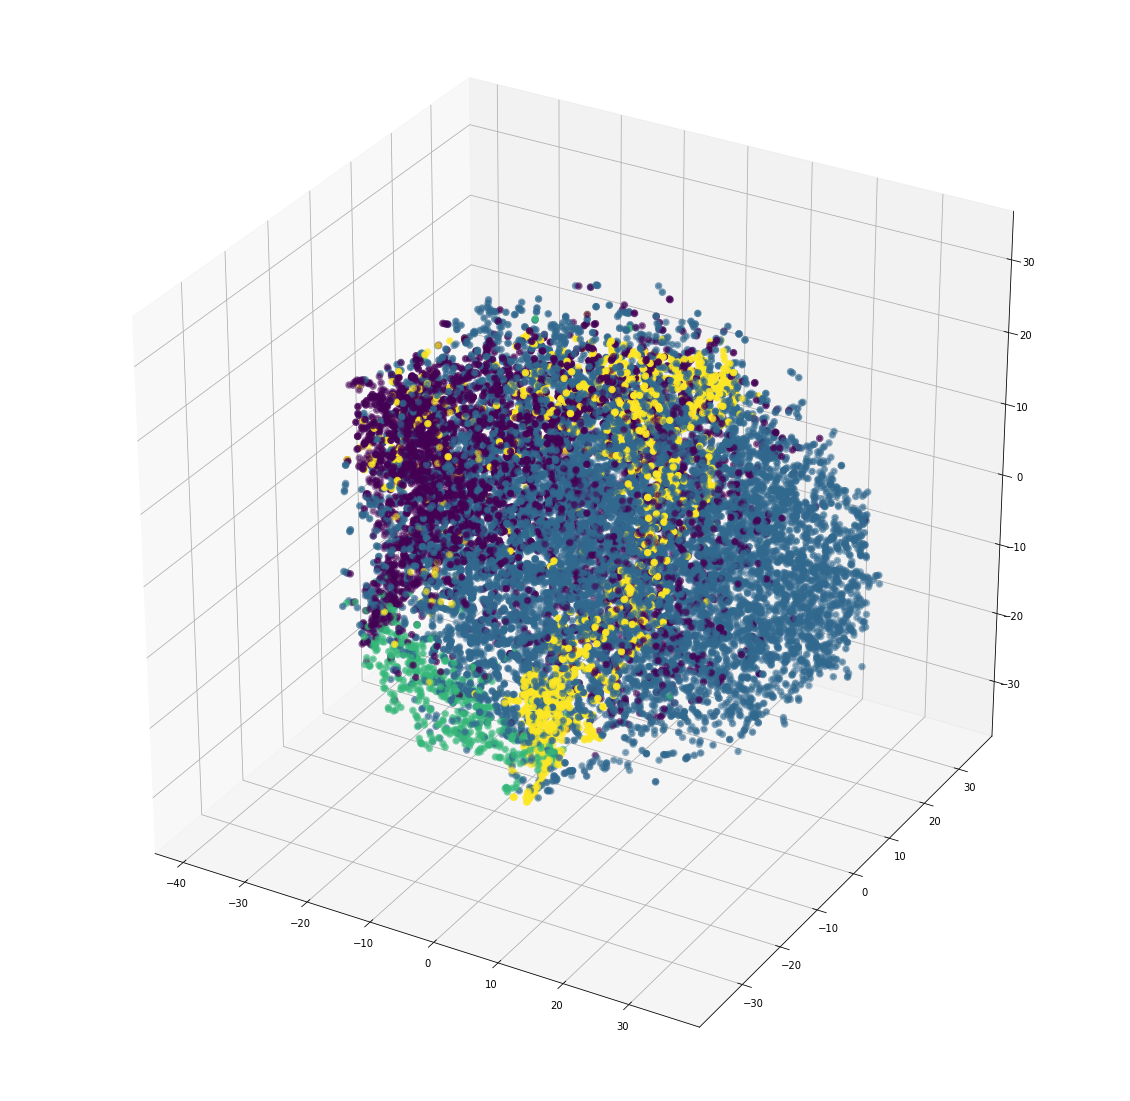

In [20]:
# t-SNE

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], c=cl, lw=3)